**Генерация синтетического набора данных для задачи линейной регрессии.**
Используется функция `make_regression` из sklearn для создания DataFrame с 5 признаками и целевой переменной.

In [3]:
# Генерация данных
from sklearn.datasets import make_regression
import pandas as pd


X, Y = make_regression(n_samples=400, n_features=5, n_informative=3, noise=50, random_state=796695)
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['target'] = Y

df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.679404,-1.107909,-0.993235,0.755668,-0.938151,108.316702
1,0.107424,0.265264,-0.585100,-0.733283,1.091935,13.909986
2,1.519339,1.260758,-0.185686,-0.545053,-1.103626,97.169095
3,-2.809398,2.135973,0.181703,0.354989,-0.739024,-202.422420
4,-0.545706,1.040585,0.349118,-1.561023,0.694047,-137.552398
...,...,...,...,...,...,...
395,0.477472,0.889927,0.956987,-1.417575,-0.391851,56.175415
396,0.598644,-0.382982,-0.476550,-1.036564,-0.757354,-55.901841
397,-1.304984,-0.934242,0.028926,-0.765830,-0.649392,-221.397780
398,1.511155,-0.991268,1.431982,2.007631,0.113080,175.308633


**Числовые характеристики (7-point summary) всех признаков.**
Метод `describe()` выводит count, mean, std, min, 25%, 50%, 75%, max для каждого признака.
Результат сохраняется в Excel-файл для дальнейшего анализа.

In [2]:
# 7-point summary
summary = df.describe()
display(summary)
print("""
Пояснения:
count — количество наблюдений;
mean — среднее значение;
std — стандартное отклонение;
min — минимум;
25% — первый квартиль;
50% — медиана;
75% — третий квартиль; todo: написать пояснение
max — максимум.
Эти характеристики позволяют оценить распределение, разброс и наличие выбросов.
""")

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.049058,0.076802,0.023753,0.054225,0.059596,-0.064788
std,0.975659,1.014831,0.984289,1.002216,0.905326,107.962233
min,-2.892543,-2.608894,-3.044216,-2.580060,-2.384268,-294.777641
25%,-0.696742,-0.598703,-0.645063,-0.637331,-0.577483,-77.688628
50%,-0.061990,0.099776,0.007335,0.045475,0.067051,-2.908217
75%,0.599451,0.769885,0.663809,0.743208,0.620315,77.926144
max,2.891481,3.225974,2.722610,2.860801,2.827870,290.807774



Пояснения:
count — количество наблюдений;
mean — среднее значение;
std — стандартное отклонение;
min — минимум;
25% — первый квартиль;
50% — медиана;
75% — третий квартиль; todo: написать пояснение
max — максимум.
Эти характеристики позволяют оценить распределение, разброс и наличие выбросов.



**Визуализация распределения признаков: boxplot и violinplot.**
Boxplot показывает медиану, квартиль, "усы" и выбросы (точки вне усов).
Violinplot отображает форму распределения и плотность.
Выбросы видны как точки вне "усов" на boxplot.

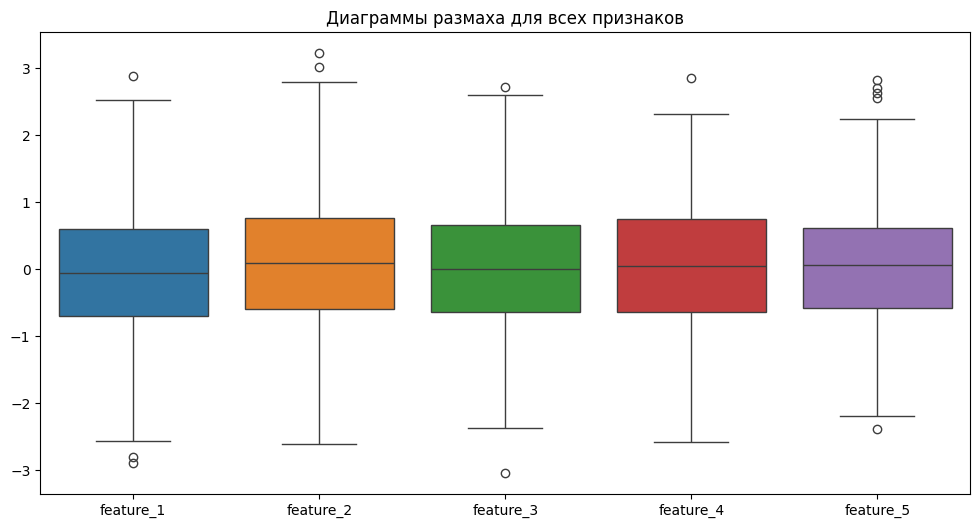

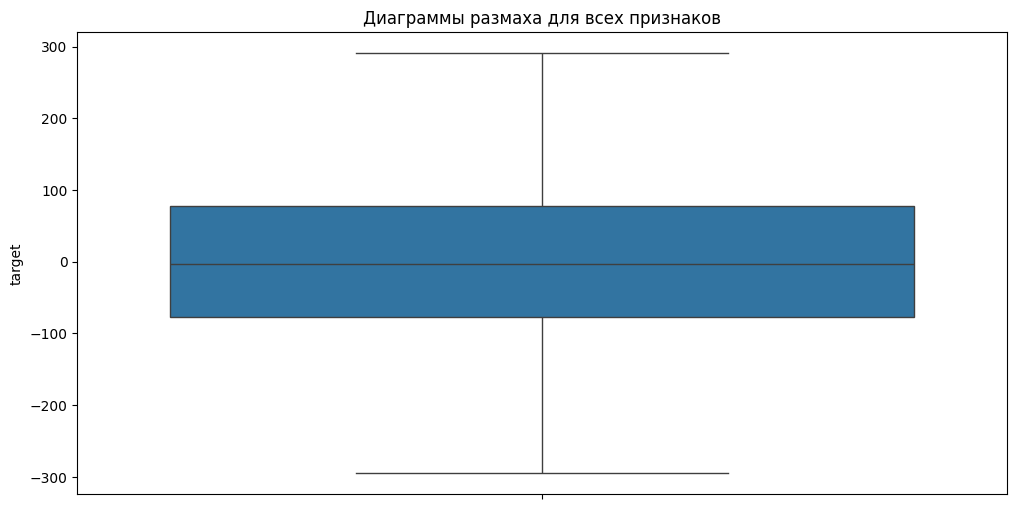

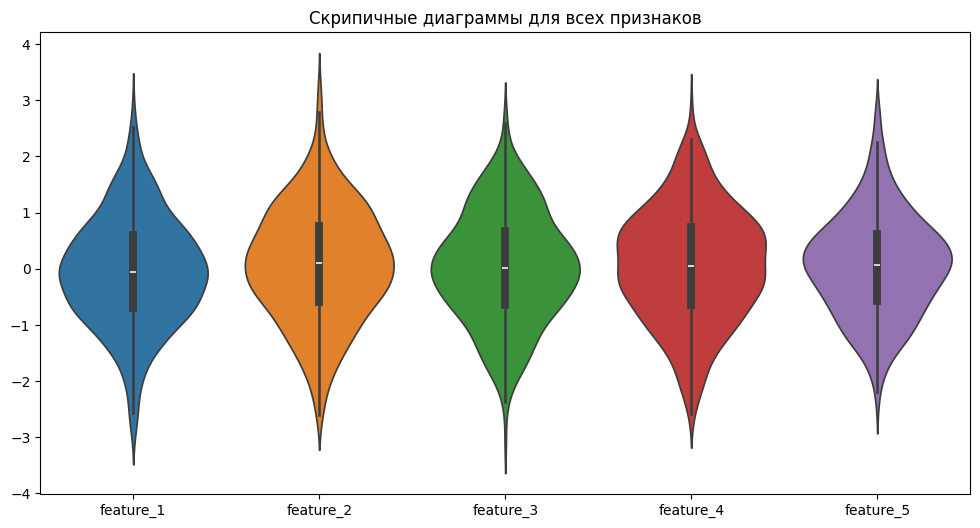

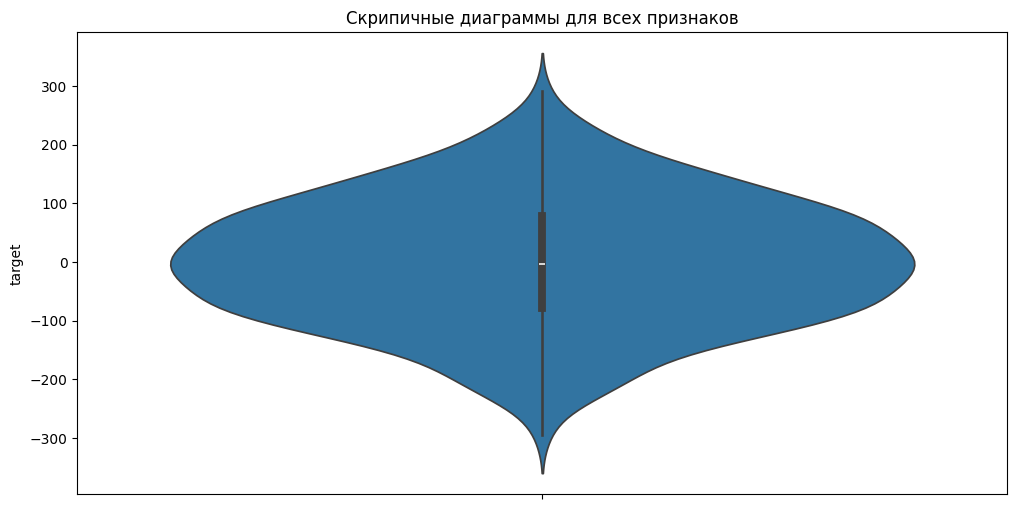

In [3]:
# Диаграммы размаха (boxplot) и скрипичные диаграммы (violinplot)
import matplotlib.pyplot as plt
import seaborn as sns

data = [df['feature_1'], df['feature_2'], df['feature_3'], df['feature_4'], df['feature_5']]

plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Диаграммы размаха для всех признаков")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df['target'])
plt.title("Диаграммы размаха для всех признаков")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=data)
plt.title("Скрипичные диаграммы для всех признаков")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df['target'])
plt.title("Скрипичные диаграммы для всех признаков")
plt.show()

**Построение нескольких boxplot на одном полотне с разными осями.**
Используется `plt.subplots` для размещения нескольких графиков.
Размер полотна задается параметром `figsize`.

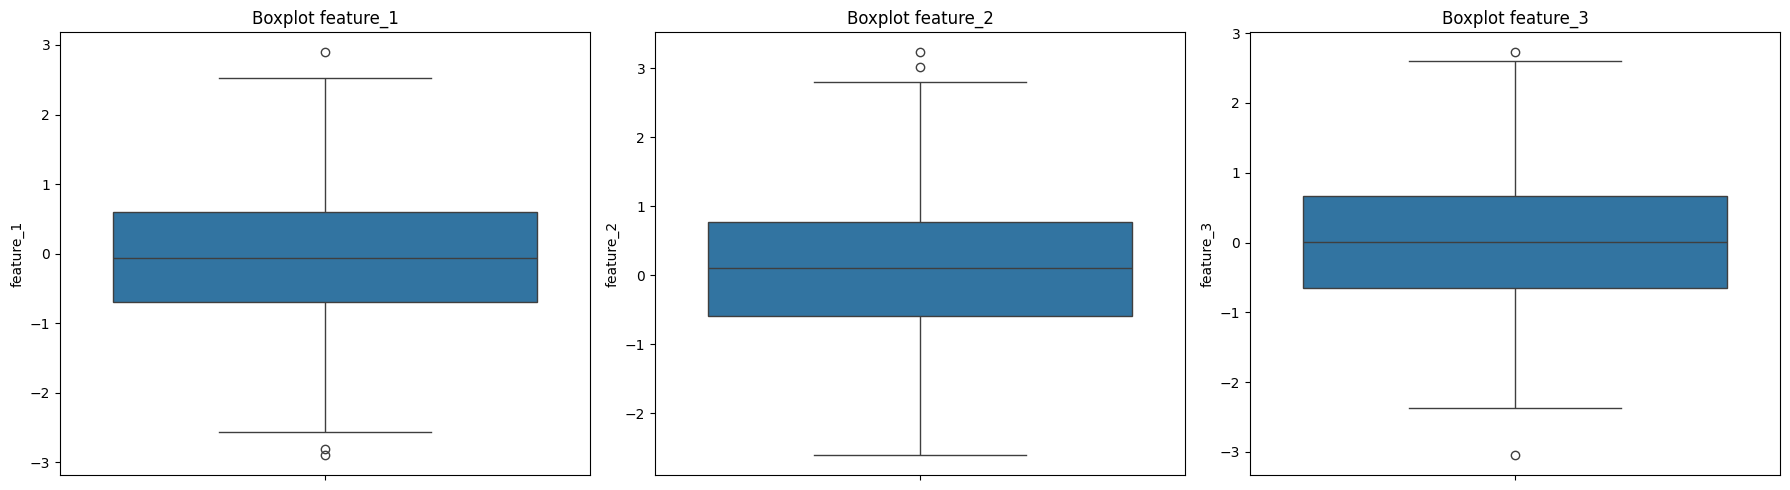

In [4]:
# Несколько boxplot на одном полотне с разными осями
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3):
    sns.boxplot(y=df[f'feature_{i+1}'], ax=axes[i])
    axes[i].set_title(f'Boxplot feature_{i+1}')
plt.tight_layout()
plt.show()

**Гистограмма распределения целевого признака.**
Показаны варианты с автоматическим и большим количеством столбцов (bins).
Гистограмма позволяет выявить детали, выбросы и асимметрию в данных.

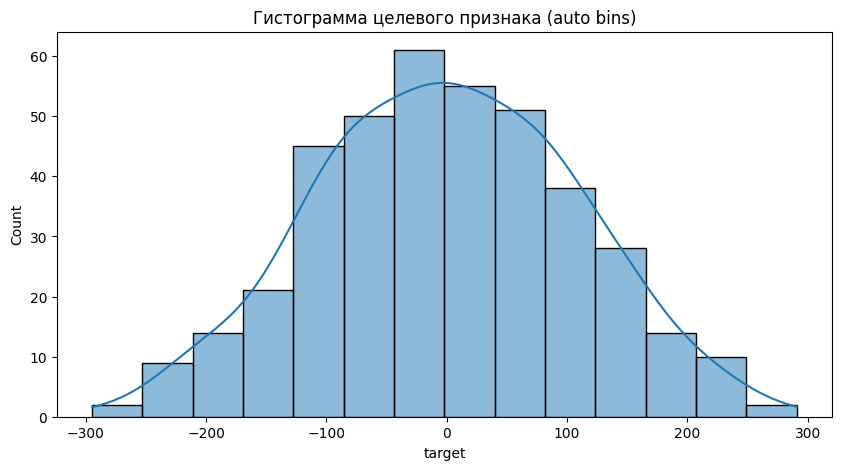

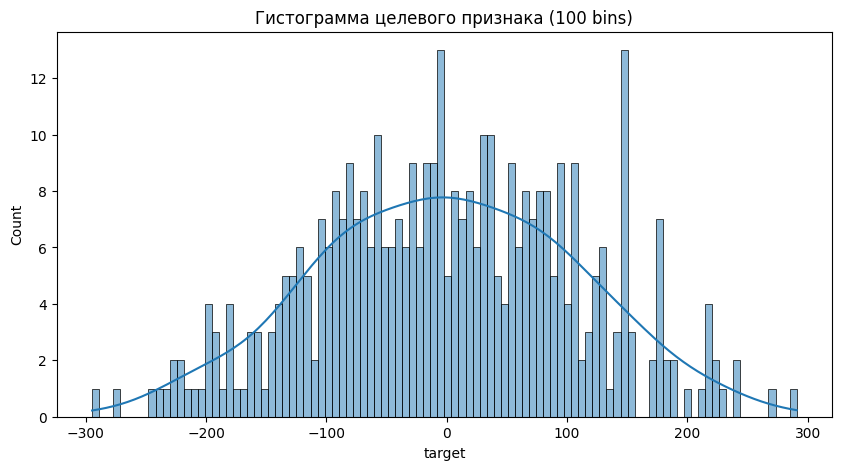

In [5]:
# Гистограмма целевого признака
plt.figure(figsize=(10, 5))
sns.histplot(df['target'], bins='auto', kde=True)
plt.title("Гистограмма целевого признака (auto bins)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['target'], bins=100, kde=True)
plt.title("Гистограмма целевого признака (100 bins)")
plt.show()


**Матрица корреляции и её визуализация через тепловую карту.**
Тепловая карта показывает силу и направление связей между признаками.
Сильная корреляция с целевым признаком — признак значимости.
Высокая корреляция между независимыми признаками — мультиколлинеарность, что может ухудшать качество регрессии.

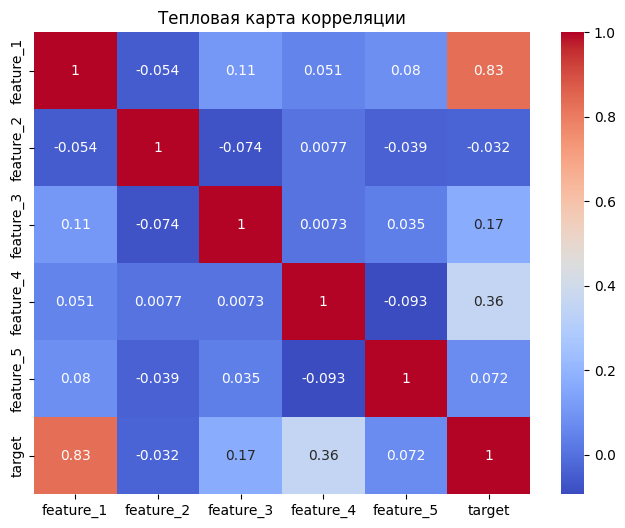

In [6]:
# Матрица корреляции и тепловая карта
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляции")
plt.show()

**Анализ влияния признаков на целевой признак.**
Выводятся коэффициенты корреляции между признаками и целевым.
Наиболее значимые признаки определяются по абсолютному значению корреляции.

In [7]:
# Какие признаки влияют на целевой сильнее всего?
target_corr = corr['target'].drop('target').abs()
most_corr_features = target_corr.sort_values(ascending=False)
display(most_corr_features)
print(f"Наиболее значимые признаки: {most_corr_features.index[:2].tolist()}")

feature_1    0.831875
feature_4    0.357098
feature_3    0.169079
feature_5    0.072415
feature_2    0.032293
Name: target, dtype: float64

Наиболее значимые признаки: ['feature_1', 'feature_4']


**Попарные диаграммы рассеяния (pairplot) для всех признаков.**
Pairplot показывает взаимосвязь между всеми признаками и целевым.
Для признака с наибольшей корреляцией с целевым — предсказания будут точнее.

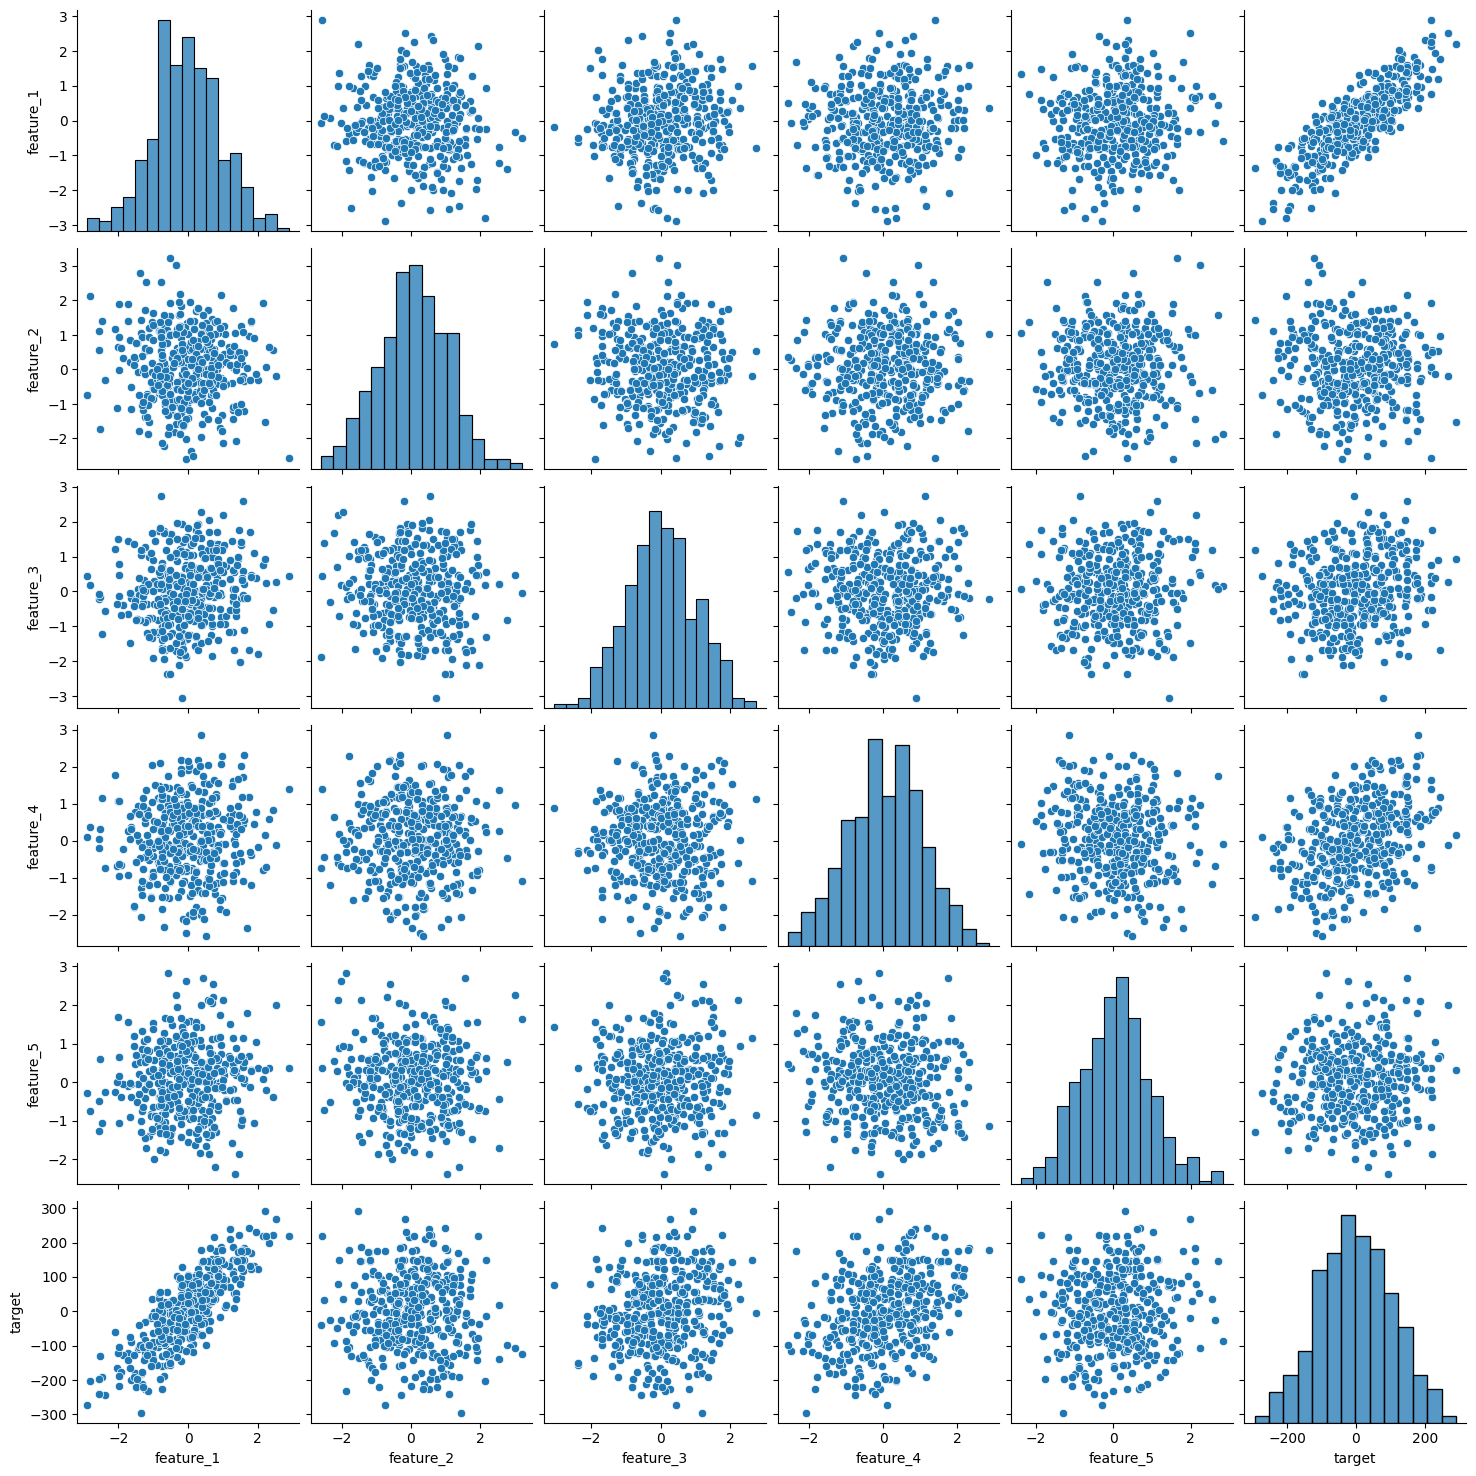

In [8]:
# Попарные диаграммы рассеяния (pairplot)
sns.pairplot(df)
plt.show()

**Jointplot для самого значимого признака и целевого.**
Jointplot показывает распределение и связь между выбранным признаком и целевым.

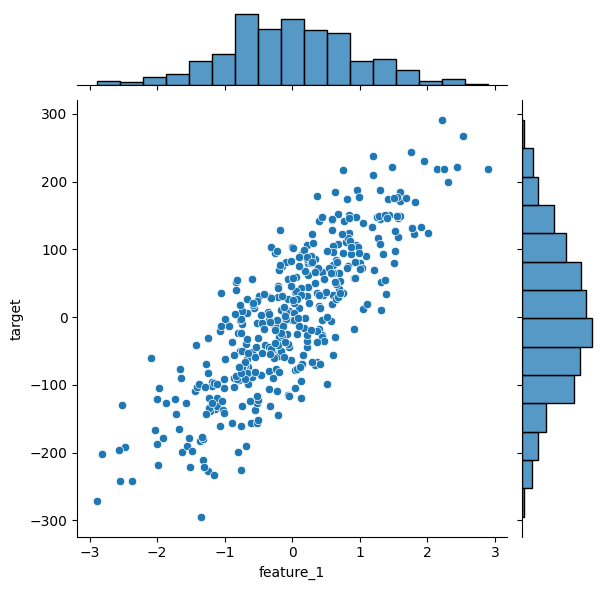

In [9]:
# Jointplot для самого значимого признака
best_feature = most_corr_features.index[0]
sns.jointplot(x=df[best_feature], y=df['target'], kind='scatter')
plt.show()

**Интерактивные 2D и 3D scatter plot с помощью Plotly.**
2D scatter — связь между самым значимым признаком и целевым.
3D scatter — связь между двумя наиболее значимыми признаками и целевым.

In [10]:
# Plotly: 2D и 3D scatter plot
import plotly.express as px

fig2d = px.scatter(df, x=best_feature, y='target', color='feature_4',
                   title=f"Plotly 2D Scatter: {best_feature} vs target")
fig2d.show()

second_feature = most_corr_features.index[1]
fig3d = px.scatter_3d(df, x=best_feature, y=second_feature, z='target', color='feature_3',
                      title=f"Plotly 3D Scatter: {best_feature}, {second_feature}, target")
fig3d.show()

**Диаграмма плотности для самого значимого признака.**
Плотность позволяет оценить форму распределения признака.

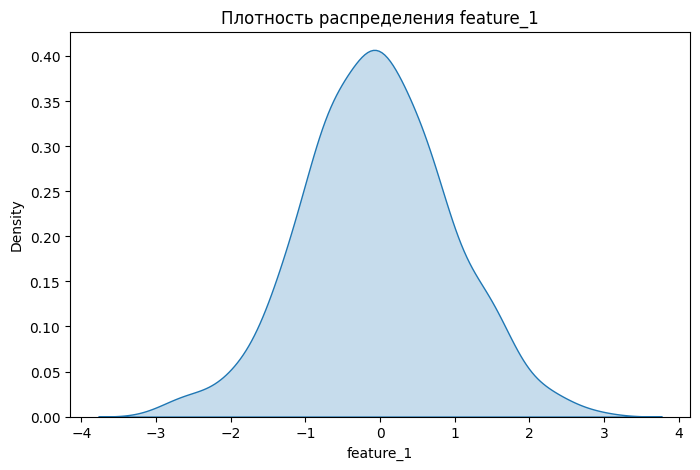

In [11]:
# Бонус: диаграмма плотности для самого значимого признака
plt.figure(figsize=(8, 5))
sns.kdeplot(df[best_feature], fill=True)
plt.title(f"Плотность распределения {best_feature}")
plt.show()

**Обучение модели линейной регрессии и оценка её качества**

В этой части мы обучим модель линейной регрессии, разделим данные на обучающую и тестовую выборки, оценим качество модели с помощью метрик MSE, MAE и коэффициента детерминации $R^2$.  
Также приведём формулы функций потерь и пояснения к ним.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Разделение данных на обучающую и тестовую выборки
# test_size=0.25 — 25% данных для теста, random_state — для воспроизводимости
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=796695)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)


import joblib

with open('model.joblib', 'wb') as f:
    joblib.dump(model, f)

# Предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оценка качества модели: MSE, MAE, R2
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}, MAE: {mae_train:.2f}, R2: {r2_train:.3f}")
print(f"Test  MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, R2: {r2_test:.3f}")

# Комментарии:
# mean_squared_error — среднеквадратичная ошибка: MSE = (1/n) * sum((y_true - y_pred)^2)
# mean_absolute_error — средняя абсолютная ошибка: MAE = (1/n) * sum(|y_true - y_pred|)
# r2_score — коэффициент детерминации

Train MSE: 2314.38, MAE: 38.79, R2: 0.792
Test  MSE: 2476.83, MAE: 40.35, R2: 0.808


In [5]:
model.predict([[0.6794037440924965, -1.107909180853875, -0.9932346052703587, 0.75566793591411, -0.9381506303820321]])

d:\Прога\AI\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.12437874])

In [7]:
# Оценка модели методом Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Создание модели линейной регрессии
model_cv = LinearRegression()

# Выполнение кросс-валидации с 5 фолдами
cv_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='r2')

# Вычисление среднего R2
mean_r2_cv = cv_scores.mean()
print(f"Средний R2 по кросс-валидации: {mean_r2_cv:.3f}")

# Сравнение с R2 на тестовой выборке
print(f"R2 на тестовой выборке: {r2_test:.3f}")

Средний R2 по кросс-валидации: 0.784
R2 на тестовой выборке: 0.808


### Объяснение различий в R2

- **R2 на тестовой выборке**: Этот показатель отражает, как хорошо модель обобщает на новых данных, которые она не видела во время обучения. Если модель переобучилась, R2 на тестовой выборке может быть значительно ниже, чем на обучающей выборке.

- **Средний R2 по кросс-валидации**: Этот показатель дает более надежную оценку производительности модели, так как он учитывает различные подмножества данных. Если R2 по кросс-валидации значительно отличается от R2 на тестовой выборке, это может указывать на переобучение модели или на то, что тестовая выборка не является репрезентативной для всей выборки данных.

### Заключение
Сравнение R2 на тестовой выборке и среднего R2 по кросс-валидации позволяет оценить, насколько хорошо модель может обобщать на новых данных. Если значения значительно различаются, это может быть признаком переобучения или недостаточной репрезентативности тестовой выборки.

**Пояснения к метрикам и функциям потерь**

- **MSE (Mean Squared Error)** — среднеквадратичная ошибка, вычисляется по формуле:
  $$
  \mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  Показывает средний квадрат отклонения предсказаний от истинных значений.

- **MAE (Mean Absolute Error)** — средняя абсолютная ошибка:
  $$
  \mathrm{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$
  Показывает среднее абсолютное отклонение предсказаний.

- **Коэффициент детерминации $R^2$**:
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
  $$
  Показывает долю объяснённой дисперсии целевой переменной моделью (от 0 до 1, иногда может быть отрицательным).
  (объ/ъяснить y- и y^)

**Функция потерь** — это формула, которую оптимизирует модель при обучении, например, MSE. Она нужна для оценки того, насколько хорошо модель предсказывает значения, и для корректировки параметров модели.

**Почему результаты на train и test могут отличаться?**
- На обучающей выборке модель "видела" данные, поэтому ошибки обычно меньше.
- На тестовой выборке оценивается способность модели обобщать на новые данные. Если модель переобучилась, ошибка на тесте будет выше.